In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Capital punishment pre 1974
csv_file_pre = "cleanedICPSRpre1974.csv"
df_pre = pd.read_csv(csv_file_pre)
df_pre.head()

,Unnamed: 0,Race of Offender,Age at Execution,Name of Offender,Place of Execution,Jurisdiction of Exection,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,13063,White,,KENDALL GEORGE,2,6,18,Shot,,,1608,51,95,NaN,James City County,Virginia
1,13064,White,,FRANK DANIELL,2,6,43,Hanging,1,3,1622,51,95,NaN,James City County,Virginia
2,13065,White,,CORNISH RICHARD,2,6,30,Hanging,,,1624,51,95,NaN,James City County,Virginia
3,13066,White,21,HAYLE THOMAS,2,6,2,Hanging,6,,1626,51,95,NaN,James City County,Virginia
4,5796,White,40,BILLINGTON JOHN,2,6,1,Hanging,30,9,1630,25,23,NaN,Whitman town,Massachusetts


In [3]:
#Capital punishment post 1974
csv_file_post = "cleanedICPSRpost1974.csv"
df_post = pd.read_csv(csv_file_post)

In [4]:
csv_file_exec = "executioncodes.csv"
df_exec = pd.read_csv(csv_file_exec)

In [5]:
df_exec.head()

,Unnamed: 0,raw,ICPSR Number,ICPSR Edition Number,ICPSR Part Number,Case Number,Race of Offender,Age at Execution,Name of Offender,Place of Execution,...,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,0,8451410100011 NORMAN ELI 240...,8451,4,1,1000,1,,NORMAN ELI,2,...,01,1,19,12,1812,1,89,NaN,Madison County,Alabama
1,1,8451410100021 WOODS JOHN 464...,8451,4,1,1000,1,,WOODS JOHN,4,...,44,4,06,02,1814,1,0,NaN,York city,Alabama
2,2,8451410100032 GAMARRA CHARLES 221...,8451,4,1,1000,2,,GAMARRA CHARLES,2,...,13,1,19,05,1820,1,97,NaN,Mobile County,Alabama
3,3,8451410100042 DESAYAS VICTORIANO 220...,8451,4,1,1000,2,,DESAYAS VICTORIANO,2,...,01,1,19,05,1820,1,97,NaN,Mobile County,Alabama
4,4,8451410100052 NOREAGO FRANCISCO 220...,8451,4,1,1000,2,,NOREAGO FRANCISCO,2,...,01,1,30,05,1822,1,97,NaN,Mobile County,Alabama


In [8]:
#Clean Dataset for ML
df_pre['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Crimes Committed'])]
df_pre['Place of Execution'].replace(' ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Place of Execution'])]

df_post['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_post = df_post[pd.notnull(df_post['Crimes Committed'])]

df_exec['Method of Execution'].replace(' ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Method of Execution'])]
df_exec['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Crimes Committed'])]
df_exec['Race of Offender'].replace(' ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Race of Offender'])]

In [9]:
#Convert String to Int
df_pre['Crimes Committed'] = df_pre['Crimes Committed'].astype(int)
df_pre['Place of Execution'] = df_pre['Place of Execution'].astype(int)


df_post['Crimes Committed'] = df_post['Crimes Committed'].astype(int)

df_exec['Method of Execution'] = df_exec['Method of Execution'].astype(int)
df_exec['Crimes Committed'] = df_exec['Crimes Committed'].astype(int)
df_exec['Race of Offender'] = df_exec['Race of Offender'].astype(int)


In [10]:
#Choose columns
#selected_features_pre = df_pre[['Crimes Committed', 'Year', 'State', 'County']]
#selected_features_pre = df_pre[['Crimes Committed', 'Year']]
selected_features_pre = df_pre[['Crimes Committed', 'Place of Execution']]

#selected_features_post = df_post[['Crimes Committed', 'Year', 'State', 'County']]
selected_features_post = df_post[['Crimes Committed', 'Year']]

#selected_features_exec = df_exec[['Method of Execution', 'Year']]
#selected_features_exec = df_exec[['Method of Execution', 'Crimes Committed']]
selected_features_exec = df_exec[['Method of Execution', 'Crimes Committed']]

In [11]:
selected_features_exec

,Method of Execution,Crimes Committed
0,1,1
1,4,44
2,1,13
3,1,1
4,1,1
5,1,39
6,1,1
7,1,15
8,1,1
9,1,1


In [12]:
#Check health of selected data pre 1974
dataset_array_pre = selected_features_pre.values
print(dataset_array_pre.dtype)
print(dataset_array_pre)

int64
[[18  2]
 [43  2]
 [30  2]
 ...
 [ 1  3]
 [ 1  3]
 [ 1  3]]


In [13]:
#Check health of selected data post 1974
dataset_array_post = selected_features_post.values
print(dataset_array_post.dtype)
print(dataset_array_post)

int64
[[  10 1977]
 [  10 1979]
 [   1 1979]
 ...
 [  23 2002]
 [   1 2002]
 [  10 2002]]


In [14]:
dataset_array_exec = selected_features_exec.values
print(dataset_array_exec.dtype)
print(dataset_array_exec)

int64
[[ 1  1]
 [ 4 44]
 [ 1 13]
 ...
 [ 5 11]
 [ 5 11]
 [ 5 26]]


In [15]:
X_pre = dataset_array_pre

In [16]:
X_post = dataset_array_post

In [17]:
X_exec = dataset_array_exec

In [18]:
# Create a kmeans model using k = 
from sklearn.cluster import KMeans
kmeans_pre = KMeans(n_clusters=2)
kmeans_post = KMeans(n_clusters=2)
kmeans_exec = KMeans(n_clusters=2)

In [19]:
# Fit the model to the data
kmeans_pre.fit(X_pre)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans_post.fit(X_post)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans_exec.fit(X_exec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters_pre = kmeans_pre.predict(X_pre)
predicted_clusters_post = kmeans_post.predict(X_post)
predicted_clusters_exec = kmeans_exec.predict(X_exec)

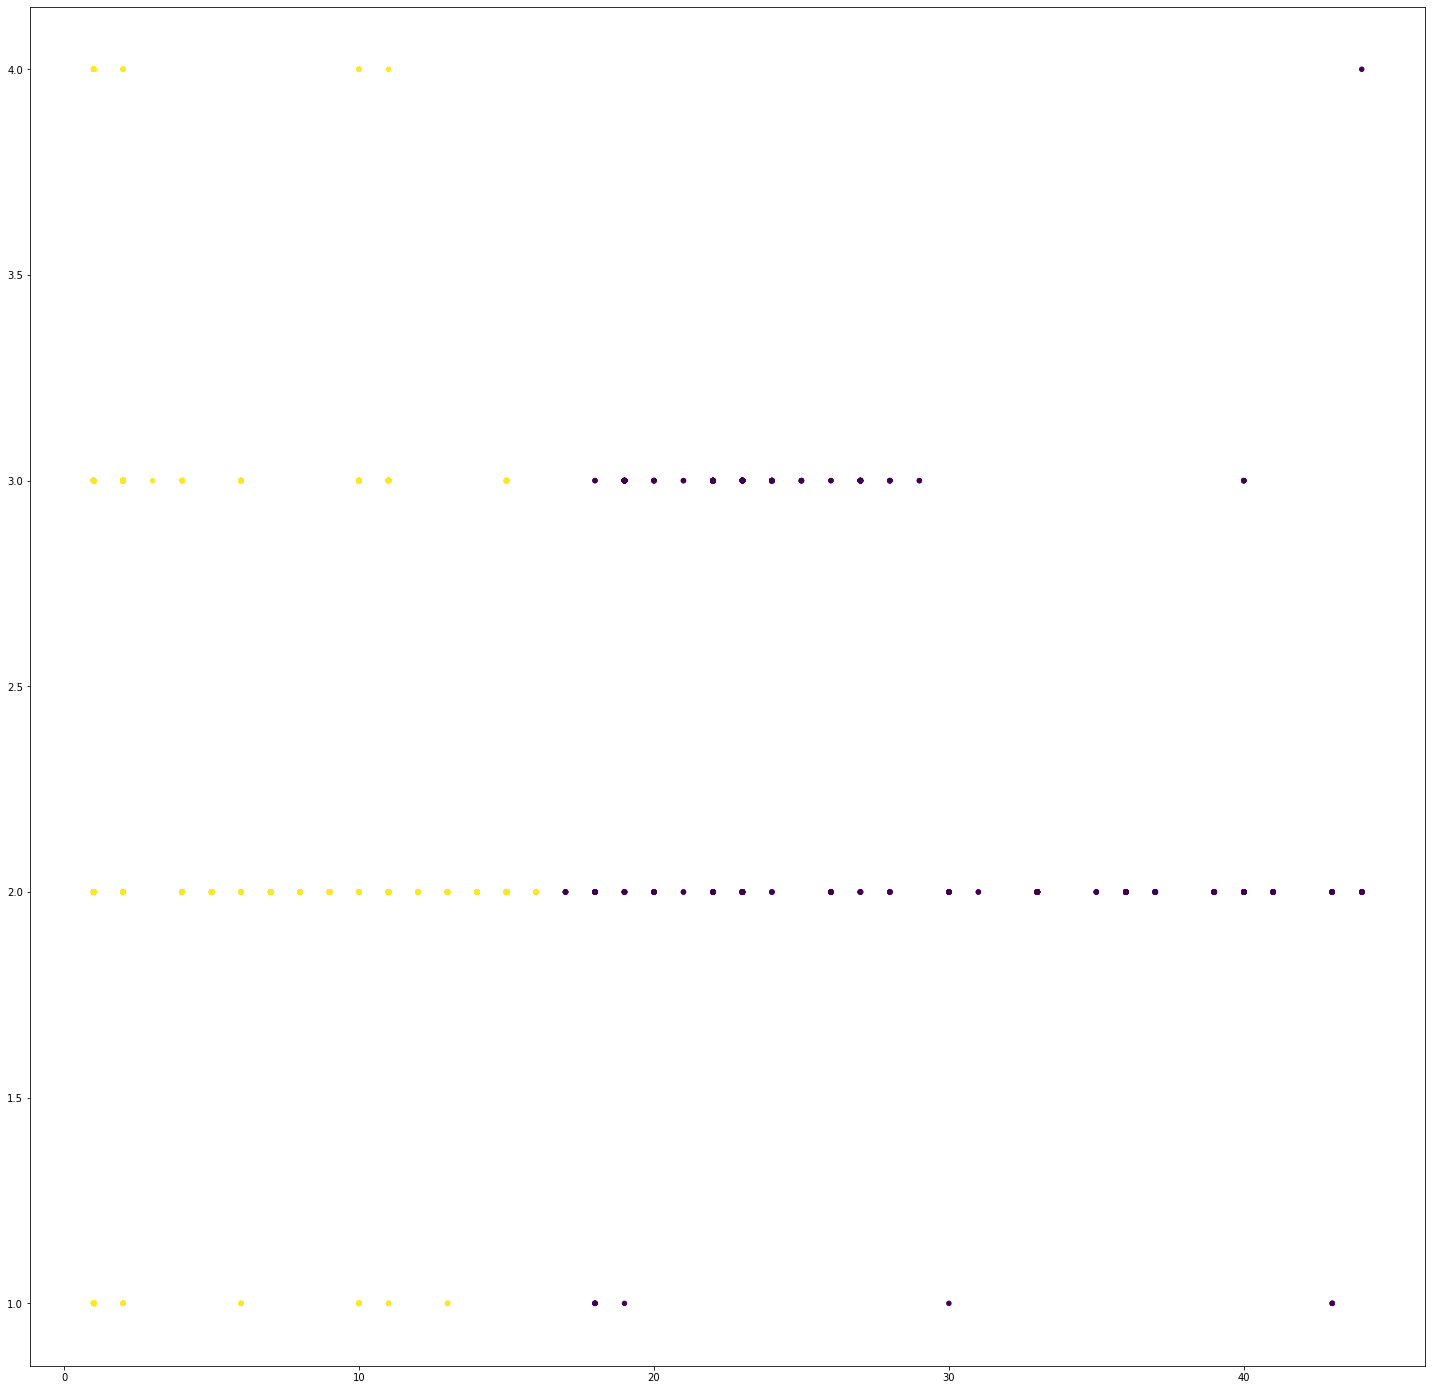

In [23]:
# Create Scatterplot
plt.figure(figsize=(25,25))
plt.scatter(X_pre[:, 0], X_pre[:, 1], c=predicted_clusters_pre, s=20, cmap='viridis')

In [22]:
plt.savefig('K-means_crimes_committed_year_pre_1974.png')

<Figure size 432x288 with 0 Axes>

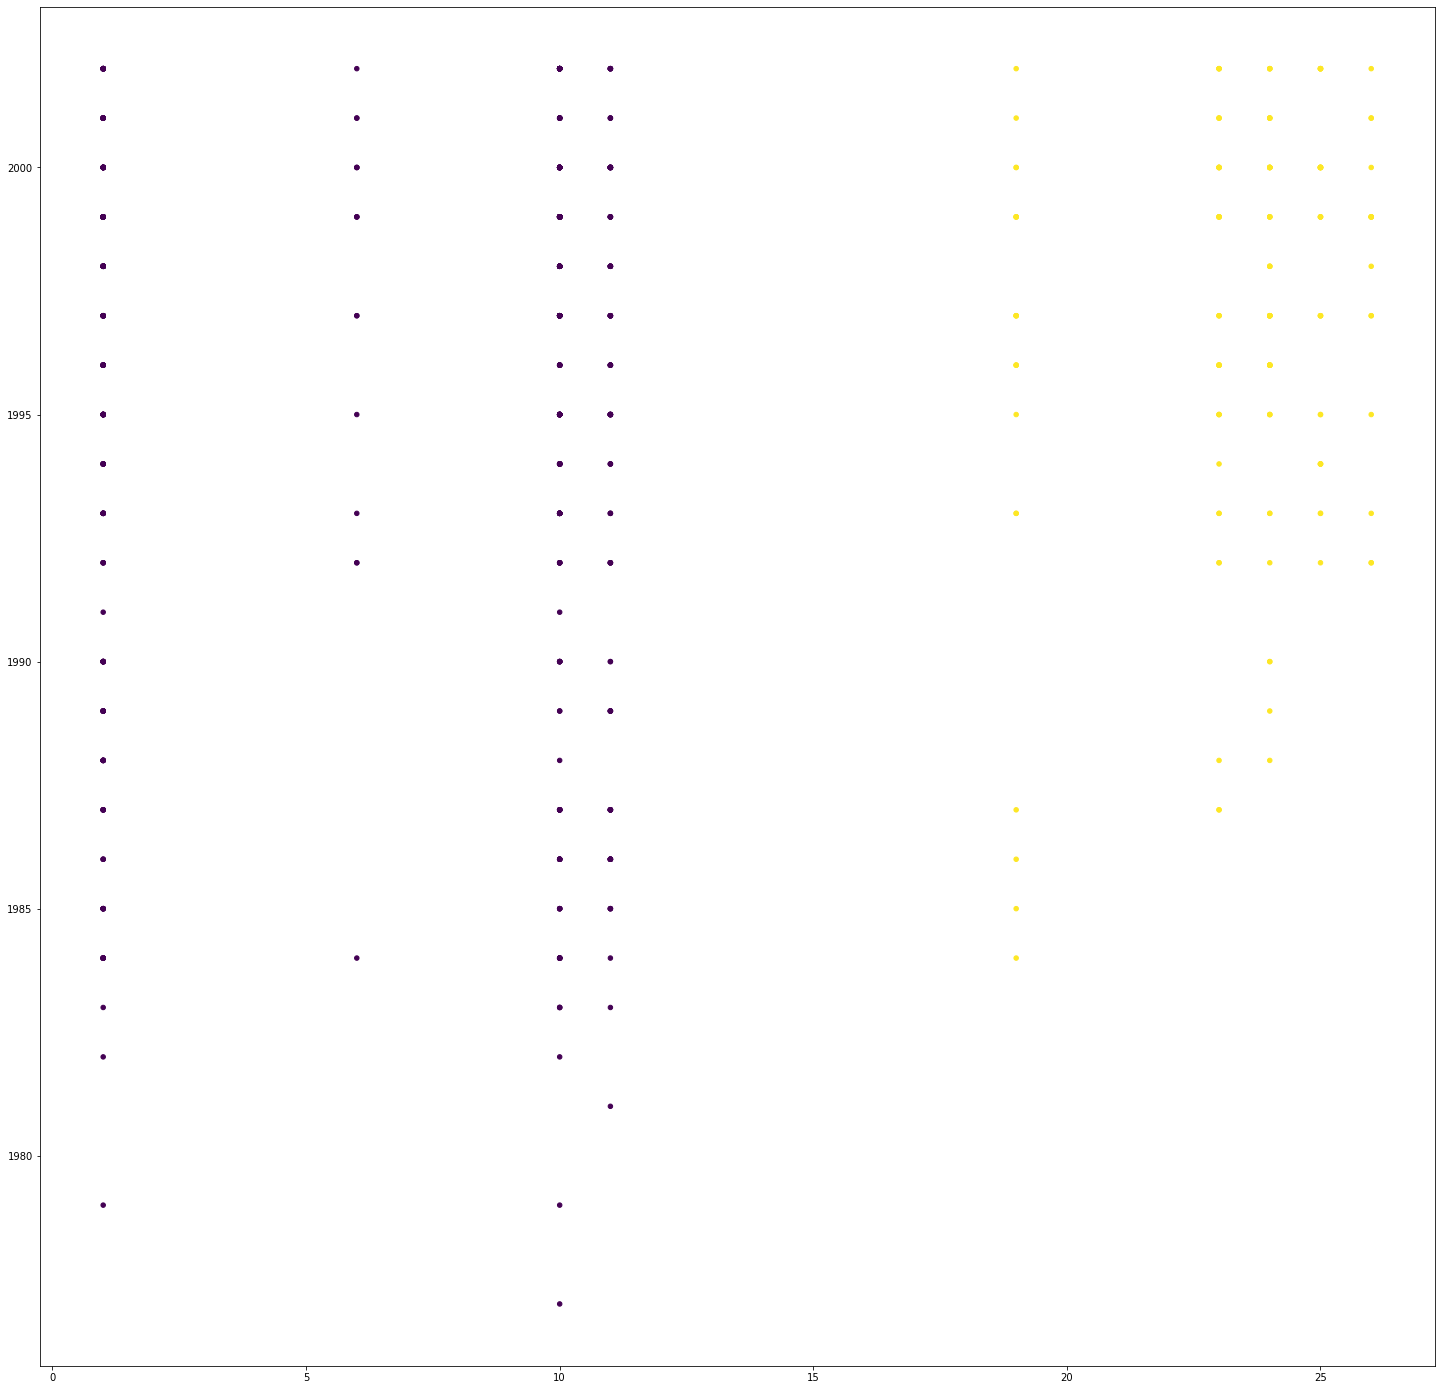

In [23]:
# Create Scatterplot
plt.figure(figsize=(25,25))
plt.scatter(X_post[:, 0], X_post[:, 1], c=predicted_clusters_post, s=20, cmap='viridis')

In [24]:
plt.savefig('K-means_crimes_committed_year_post_1974')

<Figure size 432x288 with 0 Axes>

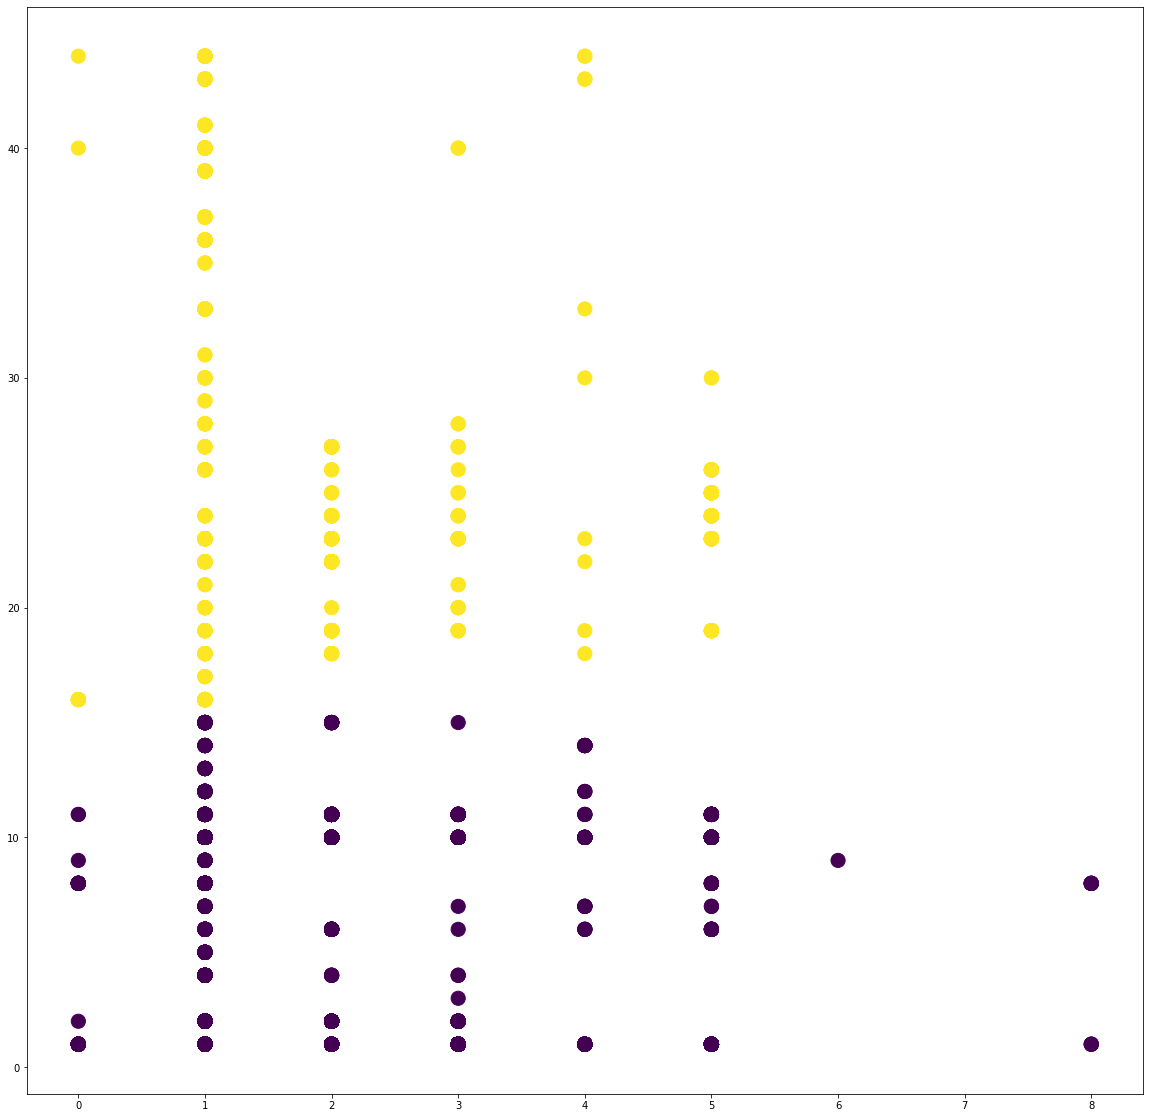

In [25]:
# Create Scatterplot
plt.figure(figsize=(20,20))
plt.scatter(X_exec[:, 0], X_exec[:, 1], c=predicted_clusters_exec, s=200, cmap='viridis')

In [26]:
plt.savefig('K-means_crimes_committed_method_of_execution_all.png')

<Figure size 432x288 with 0 Axes>